# Final Project Report

* Class: DS 5100
* Student Name: Tyler Gorecki
* Student Net ID: ttg6nx
* This URL: https://github.com/tylergorecki/ds5100-finalproject-ttg6nx/blob/main/DS5100_FinalProject.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/tylergorecki/ds5100-finalproject-ttg6nx

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import numpy as np
import pandas as pd

class Die:
    """
    A Die is an object with N sides ('faces') and W weights and can be rolled to select 
    a face. By default, each of the sides have a weight of 1, but that can be changed using 
    a method in this class to adjust individual sides. Each side is unique and the Die object 
    can be rolled one or more times, resulting in a single face for each roll. 
    """

    def __init__(self, face_values):
        """
        Initializes a Die object and saves the faces and weights of the Die in a private data 
        frame with faces as the index. 

        Parameters
        ----------
        face_values : must be a numpy array of all unique values

        Returns
        -------
        None

        Raises
        ------
        TypeError
            when face_values input is not a numpy array
        ValueError
            when face_values input does not have all unique values
        """
    
        if type(face_values) != type(np.array(1)):
            raise TypeError("Faces is not a numpy array")
        
        if len(face_values) != len(np.unique(face_values)):
            raise ValueError("Faces does not have all unique values")
        
        self._die = pd.DataFrame(data = {
            'face': face_values, 
            'weight': np.ones(len(face_values))
        }).set_index('face')
        
    def change_weight(self, face, new_val):
        """
        This method changes the weight of a single side. It takes a face and a numeric value 
        as inputs, saving that face's new weight value in the Die's private data frame. 

        Parameters
        ----------
        face : face value (side) of the Die to be changed
        new_val : new weight value for that face, must be numeric or castable to numeric

        Returns
        -------
        None

        Raises
        ------
        IndexError
            when face argument is not a face value in the current Die object
        TypeError
            when new_val input is not a numeric or a string castable to numeric
        """

        if face not in self._die.index:
            raise IndexError("Face value not in die array")
        
        if type(new_val) not in [int, float]:
            try:
                new_val = float(new_val)
            except:
                raise TypeError("The new value is not numeric or castable as numeric")

        
        self._die.loc[face] = new_val

    def roll(self, rolls = 1):
        """
        Rolls the Die one or more times. Randomly samples n (number of rolls input) times 
        and returns the face results of the rolls as a list. 

        Parameters
        ----------
        rolls : default is 1, indicates the number of rolls to sample from the Die object

        Returns
        -------
        List of face outputs that result from the random sampling of the Die object. 
        """

        weights = self._die.weight/sum(self._die.weight)

        return list(np.random.choice(
            a = self._die.index, 
            size = rolls, 
            p = weights
        ))

    def current_die_state(self):
        """
        Shows the Die object's current state by returning a copy of the private die data frame. 

        Parameters
        ----------
        None

        Returns
        -------
        The private data frame containing face values and weights for each face of the Die object. 
        """

        return self._die.copy()


class Game:
    """
    A Game object consists of rolling one or more similar Die objects one or more times. 
    The dice should be similar, meaning they have the same number of sides and associated 
    faces, and Game objects only keep the results of their most recent play. 
    """

    def __init__(self, dice):
        """
        Initializes a Game object, created from a list of similar dice. The dice should 
        have the same faces. 

        Parameters
        ----------
        dice : must be a list of already instantiated similar dice

        Returns
        -------
        None
        """

        self.dice = dice

    def play(self, rolls):
        """
        This method takes an integer parameter to specify the number of times the dice 
        should be rolled. These values are then saved in a private data frame in wide 
        format. The roll number is named index starting with 0 and each die index is the 
        column name, with the values being faces rolled for each instance. 

        Parameters
        ----------
        rolls : number of rolls to perform on each Die object within the Game object

        Returns
        -------
        None
        """

        self._play_dice = pd.DataFrame({
            die_num : die_obj.roll(rolls) for die_num, die_obj in enumerate(self.dice)
        })

    def show_recent_play(self, df_form = 'wide'):
        """
        Returns a copy of the private data frame created by the play function to the user. 
        Takes a parameter that controls whether the data frame is returned in narrow or 
        wide form. 

        Parameters
        ----------
        df_form : must be a string value in {'narrow', 'wide'}, default is 'wide'

        Returns
        -------
        Narrow or wide formed data frame consisting of the data from the most recent play 
        function call by the Game object

        Raises
        ------
        ValueError
            when df_form input is not one of 'narrow' or 'wide'
        """

        if df_form not in ['wide', 'narrow']:
            raise ValueError("Form invalid, input must be 'narrow' or 'wide'")

        if df_form == 'wide':
            return self._play_dice.copy()
        else:
            return self._play_dice.stack().to_frame('Outcome').rename_axis(['Roll', 'Die'])


class Analyzer:
    """
    An Analyzer object takes the result of a Game object and computes various descriptive 
    statistical properties about it. 
    """

    def __init__(self, game):
        """
        Initializes an Analyzer object from a Game object input. 

        Parameters
        ----------
        game : must be a Game object

        Returns
        -------
        None

        Raises
        ------
        ValueError
            when input parameter is not a Game object
        """

        if type(game) != Game:
            raise ValueError("Input parameter is not a game object")

        self.game = game

    def jackpot(self):
        """
        A jackpot is a result in which all faces are the same for each roll of all dice in
        the game. This method computes how many times this occurs among all rolls in the game. 

        Parameters
        ----------
        None

        Returns
        -------
        An integer for the number of jackpots. 
        """

        df = self.game.show_recent_play()
        df_uniques = [len(set(df.loc[i])) == 1 for i in range(len(df))]

        return sum(df_uniques)

    def face_counts_per_roll(self):
        """
        Computes the number of times each face is rolled in each event, returning a data 
        frame of the results. 

        Parameters
        ----------
        None

        Returns
        -------
        Data frame in wide format containing roll number as index, face values as columns, 
        and count values in the cells. 
        """

        df = self.game.show_recent_play()

        return df.apply(pd.Series.value_counts, axis = 1).fillna(0).astype(int)

    def combo_count(self):
        """
        Computes the distinct combinations of faces rolled and their counts. Here, the order 
        does not matter. The method returns a data frame of the results. 

        Parameters
        ----------
        None

        Returns
        -------
        Data frame with a MultiIndex of distinct combinations and a column for the associated 
        counts values. 
        """
        
        df = self.game.show_recent_play()
        new_df = pd.DataFrame([sorted(df.iloc[x]) for x in range(len(df))])
        cols = list(new_df.columns)

        return new_df.groupby(cols).size().reset_index(name = 'Count').set_index(cols)

    def permutation_count(self):
        """
        Computes the distinct permutations of faces rolled and their counts. Here, the order 
        does matter. The method returns a data frame of the results. 
        

        Parameters
        ----------
        None

        Returns
        -------
        Data frame with a MultiIndex of distinct permutations and a column for the associated 
        count values. 
        """

        df = self.game.show_recent_play()
        cols = list(df.columns)

        return df.groupby(cols).size().reset_index(name = 'Count').set_index(cols)
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
from montecarlo.montecarlo import Die, Game, Analyzer
import unittest
import numpy as np
import pandas as pd

class MontecarloTest(unittest.TestCase):

    def test_die_init(self):
        die1 = Die(np.array(['A','B','C']))

        self.assertTrue(all(die1.current_die_state().weight == 1))

    def test_die_change_weight(self):
        die1 = Die(np.array(['A','B','C']))
        die1.change_weight('B',2)

        actual = die1.current_die_state().loc['B'].weight
        expected = 2

        self.assertEqual(actual, expected)

    def test_die_roll(self):
        die1 = Die(np.array(['A','B','C']))

        self.assertTrue(type(die1.roll(10)) == list)

    def test_die_state(self):
        die1 = Die(np.array(['A','B','C']))
        actual = list(die1.current_die_state().index)
        expected = ['A','B','C']

        self.assertEqual(actual, expected)

    def test_game_init(self):
        die1 = Die(np.array(['A','B','C']))
        die2 = Die(np.array(['A','B','C']))
        die3 = Die(np.array(['A','B','C']))
        game = Game([die1, die2, die3])

        self.assertEqual(die1, game.dice[0])

    def test_game_play(self):
        die1 = Die(np.array(['A','B','C']))
        die2 = Die(np.array(['A','B','C']))
        die3 = Die(np.array(['A','B','C']))
        game = Game([die1, die2, die3])

        game.play(5)
        recent_game = game.show_recent_play()

        actual = recent_game.shape[0]
        expected = 5

        self.assertEqual(actual, expected)

    def test_game_show_play(self):
        die1 = Die(np.array(['A','B','C']))
        die2 = Die(np.array(['A','B','C']))
        die3 = Die(np.array(['A','B','C']))
        game = Game([die1, die2, die3])

        game.play(5)
        recent_game = game.show_recent_play('narrow')

        self.assertTrue(type(recent_game.index) == pd.MultiIndex)

    def test_analyzer_init(self):
        die1 = Die(np.array(['A','B','C']))
        die2 = Die(np.array(['A','B','C']))
        die3 = Die(np.array(['A','B','C']))
        game = Game([die1, die2, die3])

        game.play(5)
        analyzer1 = Analyzer(game)

        self.assertTrue(type(analyzer1.face_counts_per_roll()) == pd.DataFrame)

    def test_analyzer_jackpot(self):
        die1 = Die(np.array(['A','B','C']))
        die2 = Die(np.array(['A','B','C']))
        die3 = Die(np.array(['A','B','C']))
        game = Game([die1, die2, die3])

        game._play_dice = pd.DataFrame({
            0: ['A','A','B'], 
            1: ['A','B','B'], 
            2: ['A','C','B']
        })

        analyzer = Analyzer(game)
        actual = analyzer.jackpot()
        expected = 2
        self.assertEqual(actual, expected)

    def test_analyzer_face_counts_per_roll(self):
        die1 = Die(np.array(['A','B','C']))
        die2 = Die(np.array(['A','B','C']))
        die3 = Die(np.array(['A','B','C']))
        game = Game([die1, die2, die3])

        game._play_dice = pd.DataFrame({
            0: ['A','A','A'], 
            1: ['A','B','C'], 
            2: ['B','B','B']
        })

        analyzer = Analyzer(game)
        actual = list(analyzer.face_counts_per_roll().loc[2])
        expected = [1,1,1]
        self.assertEqual(actual, expected)


    def test_analyzer_combo_count(self):
        die1 = Die(np.array(['A','B','C']))
        die2 = Die(np.array(['A','B','C']))
        die3 = Die(np.array(['A','B','C']))
        game = Game([die1, die2, die3])

        game._play_dice = pd.DataFrame({
            0: ['B','A','B'], 
            1: ['A','B','C'], 
            2: ['B','B','B']
        })

        analyzer = Analyzer(game)
        actual = analyzer.combo_count()

        expected = pd.DataFrame({
            'Count':[2,1]
        }, index=pd.MultiIndex.from_tuples([('A','B','B'), ('B','B','C')], names=[0,1,2]))

        self.assertEqual(actual.shape, expected.shape)


    def test_analyzer_permutation_count(self):
        die1 = Die(np.array(['A','B','C']))
        die2 = Die(np.array(['A','B','C']))
        die3 = Die(np.array(['A','B','C']))
        game = Game([die1, die2, die3])

        game._play_dice = pd.DataFrame({
            0: ['C','A','A'], 
            1: ['C','B','B'], 
            2: ['B','B','B']
        })

        analyzer = Analyzer(game)
        actual = list(analyzer.permutation_count()['Count'])
        expected = [2,1]

        self.assertEqual(actual, expected)

if __name__ == '__main__':
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```text
test_analyzer_combo_count (__main__.MontecarloTest) ... ok
test_analyzer_face_counts_per_roll (__main__.MontecarloTest) ... ok
test_analyzer_init (__main__.MontecarloTest) ... ok
test_analyzer_jackpot (__main__.MontecarloTest) ... ok
test_analyzer_permutation_count (__main__.MontecarloTest) ... ok
test_die_change_weight (__main__.MontecarloTest) ... ok
test_die_init (__main__.MontecarloTest) ... ok
test_die_roll (__main__.MontecarloTest) ... ok
test_die_state (__main__.MontecarloTest) ... ok
test_game_init (__main__.MontecarloTest) ... ok
test_game_play (__main__.MontecarloTest) ... ok
test_game_show_play (__main__.MontecarloTest) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.016s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
# e.g. import montecarlo.montecarlo
import montecarlo.montecarlo
from montecarlo.montecarlo import Die, Game, Analyzer

Montecarlo package imported successfully!


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(montecarlo.montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  An Analyzer object takes the result of a Game object and computes various descriptive 
     |  statistical properties about it.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Initializes an Analyzer object from a Game object input. 
     |      
     |      Parameters
     |      ----------
     |      game : must be a Game object
     |      
     |      Returns
     |      -------
     |      None
     |      
     |      Raises
     |      ------
     |      ValueError
     |          when input parameter is not a Game object
     |  
     |  combo_count(self)
     |      Computes the distinct combinations of faces rolled and their counts. Here, the order 
     |      does not matter. The method returns a data

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/tylergorecki/ds5100-finalproject-ttg6nx/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```text
Ran in terminal: 
    pip install -e .
Output: 
    Obtaining file:///Users/tylergorecki/Desktop/DS%205100/ds5100-finalproject-ttg6nx
    Preparing metadata (setup.py) ... done
    Installing collected packages: montecarlo
    Attempting uninstall: montecarlo
    Found existing installation: montecarlo 1.0.0
    Uninstalling montecarlo-1.0.0:
    Successfully uninstalled montecarlo-1.0.0
    Running setup.py develop for montecarlo
    Successfully installed montecarlo-1.0.0
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [3]:
import numpy as np

fair_coin = Die(np.array(['H','T']))
unfair_coin = Die(np.array(['H','T']))
unfair_coin.change_weight('H',5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [4]:
game1 = Game([fair_coin, fair_coin])
game1.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [5]:
game2 = Game([unfair_coin, unfair_coin, fair_coin])
game2.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [6]:
# Game 1
analyzer1 = Analyzer(game1)
jackpots1 = analyzer1.jackpot()
jackpots1

493

In [7]:
# Game 2
analyzer2 = Analyzer(game2)
jackpots2 = analyzer2.jackpot()
jackpots2

345

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [8]:
# Analyzer 1
relfreq1 = jackpots1 / len(analyzer1.game.show_recent_play())
relfreq1

0.493

In [9]:
# Analyzer 2
relfreq2 = jackpots2 / len(analyzer2.game.show_recent_play())
relfreq2

0.345

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

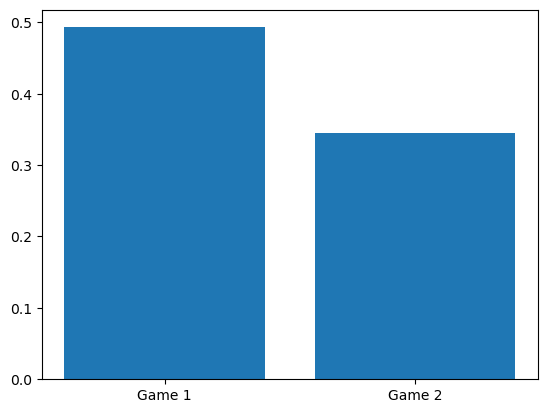

In [10]:
import matplotlib.pyplot as plt
plt.bar(x = ['Game 1', 'Game 2'], height=[relfreq1, relfreq2]);

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [11]:
die1 = Die(np.array([1,2,3,4,5,6]))
die2 = Die(np.array([1,2,3,4,5,6]))
die3 = Die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [12]:
die1.change_weight(6, 5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [13]:
die2.change_weight(1, 5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
game1 = Game([die3]*5)
game1.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [15]:
game2 = Game([die1, die2, die3, die3, die3])
game2.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [16]:
# Game 1
analyzer1 = Analyzer(game1)
relfreq1 = analyzer1.jackpot() / len(analyzer1.game.show_recent_play())
relfreq1

0.0008

In [17]:
# Game 2
analyzer2 = Analyzer(game2)
relfreq2 = analyzer2.jackpot() / len(analyzer2.game.show_recent_play())
relfreq2

0.0007

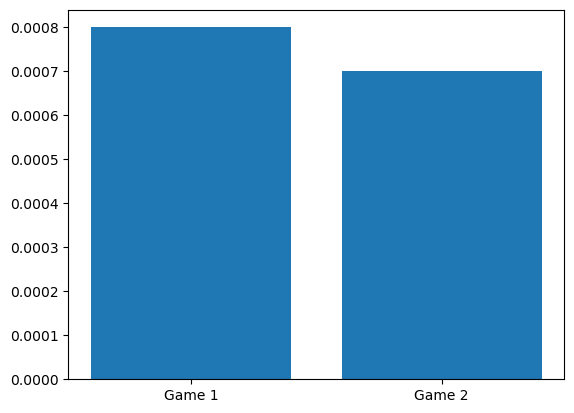

In [18]:
plt.bar(x = ['Game 1', 'Game 2'], height=[relfreq1, relfreq2]);

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [27]:
import pandas as pd
with open('ds5100_final_project_files/english_letters.txt', 'r') as file:
    content = file.read()
content

'E 529117365\nT 390965105\nA 374061888\nO 326627740\nI 320410057\nN 313720540\nS 294300210\nR 277000841\nH 216768975\nL 183996130\nD 169330528\nC 138416451\nU 117295780\nM 110504544\nF 95422055\nG 91258980\nP 90376747\nW 79843664\nY 75294515\nB 70195826\nV 46337161\nK 35373464\nJ 9613410\nX 8369915\nZ 4975847\nQ 4550166'

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).